In [1]:
import numpy as np
import pandas as pd
import torchvision
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [14]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=200, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        print(lstm_out.view(len(input_seq), -1).size())
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [5]:
a = -0.025794
c = 0.02
b1 = 0.0135
b2 = 0.0065
k = 0.129
sigma = 1
alpha = 0.35
eps = 1
beta = 10e-8
q=1.6

In [6]:
def FHN(self, X):
        x1, y1, x2, y2 = X
        return [x1*(a-x1)*(x1-1) - y1 + k*(x2-x1),
                b1*x1 - c*y1,
                x2*(a-x2)*(x2-1) - y2 + k*(x1-x2),
                b2*x2 - c*y2
               ]

In [7]:
sol = solve_ivp(FHN, [0, 25000], [-0.1, -0.1, -0.1, -0.1], 
                t_eval=np.array(range(0, 25000, 2)), rtol = 1e-11, atol = 1e-11, dense_output=True)

Text(0, 0.5, 'x1')

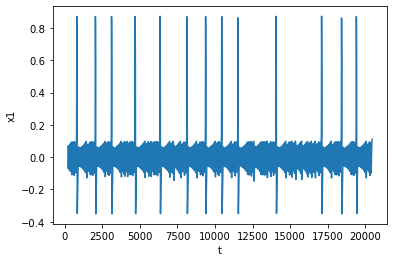

In [8]:
plt.plot(sol.t[100:10230],sol.y[0][100:10230])
plt.xlabel('t')
plt.ylabel('x1')

In [9]:
train = sol.y[0][100:10218]
test = sol.y[0][10218:] 

mean = train.mean()
std = train.std()
#sigmastest = np.abs(test - mean)
train_norm = (train - mean)/std
test_norm = (test - mean)/std

In [10]:
train_norm = torch.FloatTensor(train_norm).view(-1)
test_norm = torch.FloatTensor(test_norm).view(-1)

In [11]:
train_window = 20

def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [12]:
train_inout_seq = create_inout_sequences(train_norm, train_window)

In [13]:
from IPython.display import clear_output

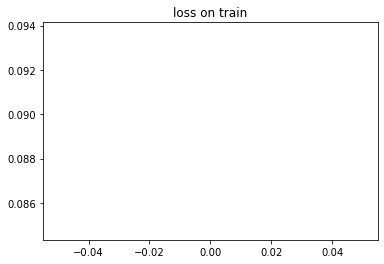

0.0892391248440924
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([2

torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size

torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size

torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size([20, 200])
torch.Size

KeyboardInterrupt: 

In [15]:
epochs = 250
model = LSTM().to('cuda')
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
learning_rate = 0.001
losses = []
for i in range(epochs):
    if i > 10:
        learning_rate *= 0.5
    epoch_loss = []
    for seq, label in train_inout_seq:
        #learning_rate *= 0.5
        optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size).to('cuda'),
                        torch.zeros(1, 1, model.hidden_layer_size).to('cuda'))
        y_pred = model(seq.to('cuda'))

        single_loss = nn.MSELoss()(y_pred, label.to('cuda'))
        single_loss.backward()
        optimizer.step()
        epoch_loss.append(single_loss.item())

        
    clear_output(True)
    losses.append(np.mean(epoch_loss))
    plt.title("loss on train")
    plt.plot(losses)
    plt.show()
    print(losses[-1])
    

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

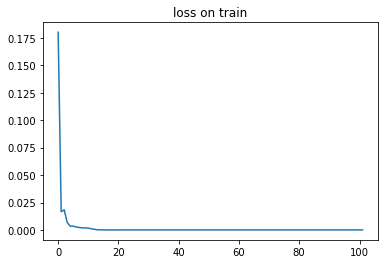

0.00017242024448039348


KeyboardInterrupt: 

In [56]:
epochs = 250
model = LSTM().to('cuda')
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
learning_rate = 0.001
losses = []
for i in range(epochs):
    if i > 10:
        learning_rate *= 0.5
    epoch_loss = []
    for seq, label in train_inout_seq:
        #learning_rate *= 0.5
        optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size).to('cuda'),
                        torch.zeros(1, 1, model.hidden_layer_size).to('cuda'))
        y_pred = model(seq.to('cuda'))

        single_loss = nn.MSELoss()(y_pred, label.to('cuda'))
        single_loss.backward()
        optimizer.step()
        epoch_loss.append(single_loss.item())

        
    clear_output(True)
    losses.append(np.mean(epoch_loss))
    plt.title("loss on train")
    plt.plot(losses)
    plt.show()
    print(losses[-1])
    

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')


In [57]:
fut_pred = 1000

test_inputs = train_norm[-train_window:].tolist()
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:]).to('cuda')
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size).to('cuda'),
                        torch.zeros(1, 1, model.hidden_layer_size).to('cuda'))
        test_inputs.append(model(seq).item())

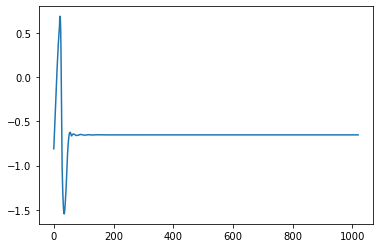

In [58]:
plt.plot(test_inputs)

In [59]:
def test_window_size(size):
    train_inout_seq = create_inout_sequences(train_norm, size)
    epochs = 10
    model = LSTM().to('cuda')
    optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
    learning_rate = 0.001
    losses = []
    for i in range(epochs):
        epoch_loss = []
        for seq, label in train_inout_seq:
            #learning_rate *= 0.5
            optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
            optimizer.zero_grad()
            model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size).to('cuda'),
                            torch.zeros(1, 1, model.hidden_layer_size).to('cuda'))
            y_pred = model(seq.to('cuda'))

            single_loss = nn.MSELoss()(y_pred, label.to('cuda'))
            single_loss.backward()
            optimizer.step()
            epoch_loss.append(single_loss.item())


        clear_output(True)
        losses.append(np.mean(epoch_loss))
        plt.title("loss on train")
        plt.plot(losses)
        plt.show()
        print(losses[-1])


    print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')
    
    
    fut_pred = 1000

    test_inputs = train_norm[-size:].tolist()
    model.eval()

    for i in range(fut_pred):
        seq = torch.FloatTensor(test_inputs[-size:]).to('cuda')
        with torch.no_grad():
            model.hidden = (torch.zeros(1, 1, model.hidden_layer_size).to('cuda'),
                            torch.zeros(1, 1, model.hidden_layer_size).to('cuda'))
            test_inputs.append(model(seq).item())
    plt.plot(test_inputs)

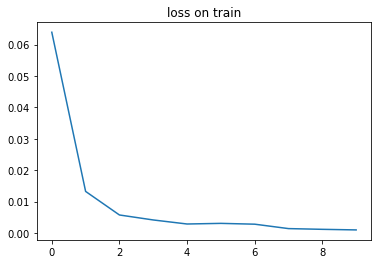

0.000971743984273273
epoch:   9 loss: 0.0000205934


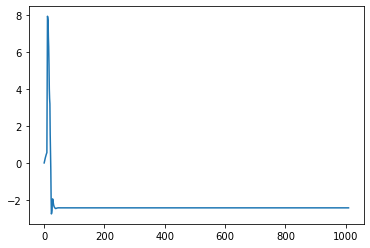

In [60]:
test_window_size(10)

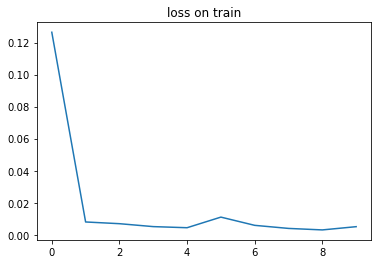

0.005017823362312178
epoch:   9 loss: 0.0000384077


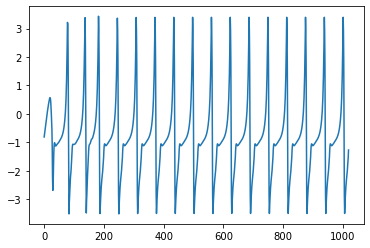

In [61]:
test_window_size(20)

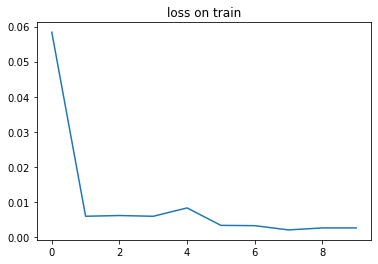

0.0025781289890884317
epoch:   9 loss: 0.0004363248


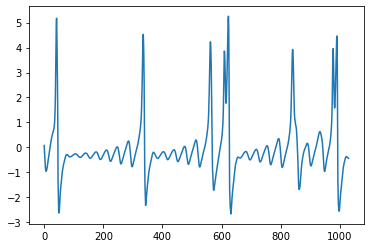

In [62]:
test_window_size(30)

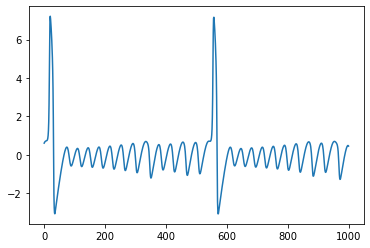

In [11]:
plt.plot(test_norm[:1000])

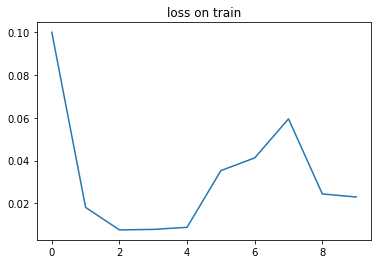

0.02295152416190153
epoch:   9 loss: 0.0457646474


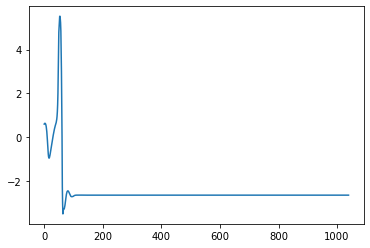

In [63]:
test_window_size(40)

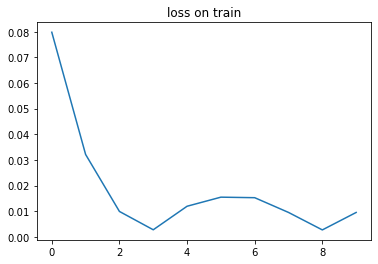

0.009515320267358842
epoch:   9 loss: 0.0000620282


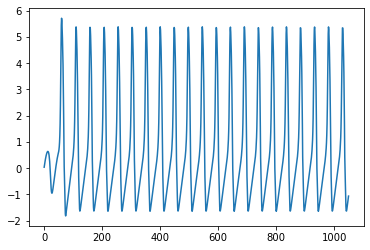

In [64]:
test_window_size(50)

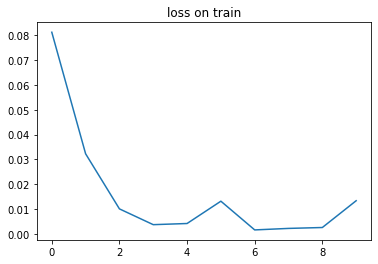

0.013368429068298424
epoch:   9 loss: 0.0038307419


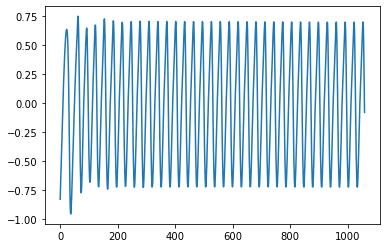

In [65]:
test_window_size(60)

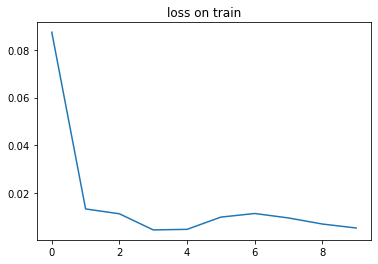

0.005488094176859574
epoch:   9 loss: 0.0098373545


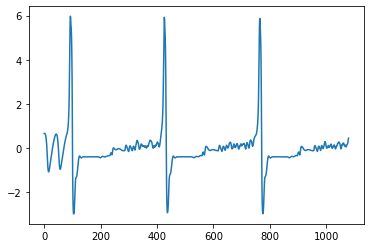

In [66]:
test_window_size(80)

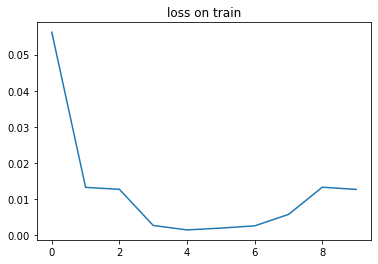

0.012649485202823585
epoch:   9 loss: 0.0110458918


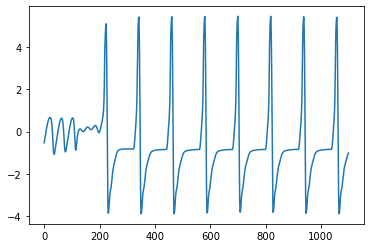

In [67]:
test_window_size(100)

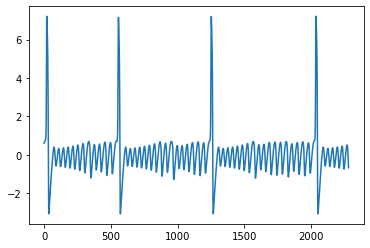

In [68]:
plt.plot(test_norm)

In [19]:
test_inputs[100:]

[0.7522785663604736,
 0.7695643901824951,
 0.7714860439300537,
 0.771611213684082,
 0.7716188430786133,
 0.7716202735900879,
 0.7716217041015625,
 0.7716226577758789,
 0.7716236114501953,
 0.7716240882873535,
 0.7716245651245117,
 0.7716255187988281,
 0.7716259956359863,
 0.7716264724731445,
 0.7716264724731445,
 0.7716269493103027,
 0.7716274261474609,
 0.7716274261474609,
 0.7716274261474609,
 0.7716274261474609]

In [22]:
true_evol = train_norm

In [250]:
len(true_evol)

10118

In [20]:
model_test = LSTM()
model_test.load_state_dict(model.state_dict())
model_test.to('cuda')
model_test.hidden_cell = (torch.zeros(1, 1, model_test.hidden_layer_size).to('cuda'),
                        torch.zeros(1, 1, model_test.hidden_layer_size).to('cuda'))

In [23]:
predicted = []

for step in range(0, len(test_norm), train_window):
    fut_pred = 20
    true_evol_per_step = test_norm[step: step + train_window]
    test_inputs = true_evol[-train_window:].tolist()
    model_test.eval()
    
    for i in range(fut_pred):
        seq = torch.FloatTensor(test_inputs[-train_window:]).to('cuda')
        with torch.no_grad():
            model_test.hidden = (torch.zeros(1, 1, model_test.hidden_layer_size).to('cuda'),
                            torch.zeros(1, 1, model_test.hidden_layer_size).to('cuda'))
            test_inputs.append(model_test(seq).item())
    predicted += test_inputs[train_window:]
    
    if len(true_evol_per_step) == train_window:
        model_test.train()
        test_inout_seq = create_inout_sequences(true_evol_per_step, train_window)
        for seq, labels in test_inout_seq:
            optimizer.zero_grad()
            model_test.hidden_cell = (torch.zeros(1, 1, model_test.hidden_layer_size).to('cuda'),
                                torch.zeros(1, 1, model_test.hidden_layer_size).to('cuda'))
            y_pred = model_test(seq.to('cuda'))

            single_loss = nn.MSELoss()(y_pred, labels.to('cuda'))
            single_loss.backward()
            optimizer.step()
    true_evol = torch.cat((true_evol, true_evol_per_step))

In [252]:
len(true_evol)

12400

In [272]:
predicted

[-0.7481163740158081,
 -0.7873939275741577,
 -0.8003643751144409,
 -0.80268394947052,
 -0.797538161277771,
 -0.7849761247634888,
 -0.7615900039672852,
 -0.7265242338180542,
 -0.6801971197128296,
 -0.6248399019241333,
 -0.5638436079025269,
 -0.5021533966064453,
 -0.4456915855407715,
 -0.4000328779220581,
 -0.3678485155105591,
 -0.3475431203842163,
 -0.3319512605667114,
 -0.3095458745956421,
 -0.27318692207336426,
 -0.22408998012542725,
 7.414846897125244,
 7.431535243988037,
 7.4292192459106445,
 7.4284820556640625,
 7.428896903991699,
 7.428886890411377,
 7.428887844085693,
 7.42888879776001,
 7.42583703994751,
 6.435214042663574,
 6.399441719055176,
 5.8740644454956055,
 5.773513317108154,
 5.774921417236328,
 4.922274589538574,
 4.55006742477417,
 4.330643653869629,
 4.187145709991455,
 4.095348834991455,
 4.021570205688477,
 -2.5917673110961914,
 -2.5833373069763184,
 -2.5690650939941406,
 -2.556260108947754,
 -2.550281524658203,
 -2.524178981781006,
 -2.4002599716186523,
 -2.164083

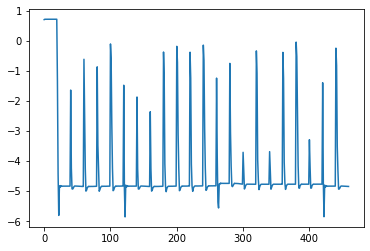

In [24]:
plt.plot(predicted)

In [288]:
predicted[540:600]

[0.7254955768585205,
 0.759441077709198,
 0.8165570497512817,
 0.9066677689552307,
 1.0596500635147095,
 1.3597785234451294,
 2.053805351257324,
 3.542520523071289,
 5.817389011383057,
 7.216159820556641,
 7.410839557647705,
 7.430907726287842,
 7.428900718688965,
 7.428427696228027,
 7.42883825302124,
 7.428889274597168,
 7.428878307342529,
 7.428896903991699,
 7.428868770599365,
 7.428895950317383,
 7.364964485168457,
 7.422447681427002,
 7.4313249588012695,
 7.429101467132568,
 7.428415298461914,
 6.4967942237854,
 6.403209209442139,
 6.394354820251465,
 5.8704328536987305,
 5.772806644439697,
 5.774835586547852,
 5.771492004394531,
 5.772113800048828,
 4.77903413772583,
 4.435580730438232,
 4.254242420196533,
 4.127035140991211,
 4.041009426116943,
 4.017014503479004,
 4.00699520111084,
 -2.221782684326172,
 -2.3046770095825195,
 -2.378777503967285,
 -2.4135990142822266,
 -2.271876811981201,
 -2.0543274879455566,
 -1.7386926412582397,
 -1.556733250617981,
 -1.5152684450149536,
 -1.

In [255]:
len(predicted)

2300

In [256]:
(len(test))

2282

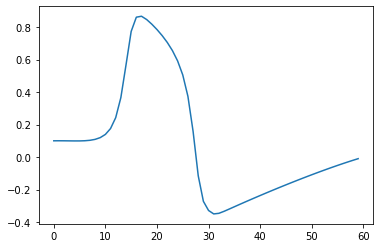

In [275]:
plt.plot(test[540:600])

In [233]:
train_norm.max()

tensor(7.2043)

In [17]:
train_norm[6000:6500].max()

tensor(0.7050)

In [15]:
test_inputs[20:40]

[0.616908073425293,
 0.6662673950195312,
 0.7360585927963257,
 0.8477460145950317,
 1.0375640392303467,
 1.382082462310791,
 2.077755928039551,
 3.553882360458374,
 5.988043308258057,
 7.623494625091553,
 7.865307807922363,
 7.769824504852295,
 7.305576801300049,
 6.853262901306152,
 6.533700942993164,
 6.257808208465576,
 5.98073148727417,
 5.655295372009277,
 5.201878547668457,
 4.45725679397583]

In [16]:
test_inputs

[-0.809381902217865,
 -0.7330803871154785,
 -0.6515586376190186,
 -0.5671824216842651,
 -0.48149025440216064,
 -0.39551928639411926,
 -0.31000402569770813,
 -0.2254968136548996,
 -0.142441987991333,
 -0.0612218864262104,
 0.017813704907894135,
 0.09432881325483322,
 0.16798919439315796,
 0.238455131649971,
 0.3053778409957886,
 0.368399441242218,
 0.427156001329422,
 0.4812846779823303,
 0.5304350256919861,
 0.5742854475975037,
 0.616908073425293,
 0.6662673950195312,
 0.7360585927963257,
 0.8477460145950317,
 1.0375640392303467,
 1.382082462310791,
 2.077755928039551,
 3.553882360458374,
 5.988043308258057,
 7.623494625091553,
 7.865307807922363,
 7.769824504852295,
 7.305576801300049,
 6.853262901306152,
 6.533700942993164,
 6.257808208465576,
 5.98073148727417,
 5.655295372009277,
 5.201878547668457,
 4.45725679397583]

In [57]:
np.max(test_inputs[:60])

7.430398941040039

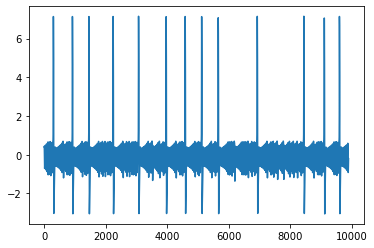

In [67]:
plt.plot(train_norm)

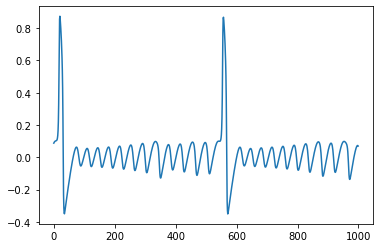

In [44]:
plt.plot(test[:1000])

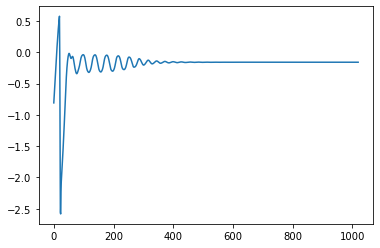

In [43]:
plt.plot(test_inputs)

In [38]:
losses = []
model = LSTM()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
for epoch in range(20):
    for x, y in zip(X_train, Y_train):
        optimizer.zero_grad()
        x = torch.from_numpy(np.expand_dims(np.array([x]), axis=0)).type(torch.FloatTensor)
        y = torch.from_numpy(np.expand_dims(np.array([y]), axis=0)).type(torch.FloatTensor)
        y_pred = model(x)
        loss = nn.MSELoss()(y_pred, y)
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
        plt.plot(range(len(losses)), losses)
        plt.ylabel("loss")
        plt.xlabel("epochs")

RuntimeError: input must have 3 dimensions, got 2